In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [33]:
data = pd.read_csv('games.csv')
data.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
data.drop(columns = ['created_at','last_move_at'], inplace = True)

In [4]:
data.columns

Index(['id', 'rated', 'turns', 'victory_status', 'winner', 'increment_code',
       'white_id', 'white_rating', 'black_id', 'black_rating', 'moves',
       'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [5]:
y = data['winner']
x = data['moves']

In [6]:
def extract_first_10_moves(moves):
    return moves.split()[:10]

move = data['moves'].apply(extract_first_10_moves).values
move = move.tolist()

In [7]:
move = pd.DataFrame(move)

In [8]:
#if winner = black 1, else 0 
y = (y=='black')

In [34]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

X = move.values
y = data['winner']=='black'

encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=42)

clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

y_predTest = clf.predict(X_test)
y_predTrain = clf.predict(X_train)

accuracyTest = accuracy_score(y_test, y_predTest)
print("Test Accuracy:", accuracyTest)

accuracyTrain = accuracy_score(y_train, y_predTrain)
print("Train Accuracy:", accuracyTrain)

Test Accuracy: 0.5922233300099701
Train Accuracy: 0.9478174163527587


In [30]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Assuming 'move' and 'data' are properly defined
X = move.values
y = data['winner']=='black'

encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=42)

# Define the classifier
clf = DecisionTreeClassifier(criterion='gini')

# Define the parameter grid
param_grid = {'max_depth': [10,20,30,40,50,60,70,80,90,100]}  # You can add more values for max_depth if needed

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Retrain the model with the best parameters
best_max_depth = best_params['max_depth']
best_clf = DecisionTreeClassifier(criterion='gini', max_depth=best_max_depth)
best_clf.fit(X_train, y_train)

# Evaluate on test set
y_pred_test = best_clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with Best Parameters:", accuracy_test)

Best Parameters: {'max_depth': 70}
Best Accuracy: 0.5633167506794796
Test Accuracy with Best Parameters: 0.584247258225324


In [31]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

X = move.values
y = data['winner']=='black'

encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', max_depth=70)
clf.fit(X_train, y_train)

y_predTest = clf.predict(X_test)
y_predTrain = clf.predict(X_train)

accuracyTest = accuracy_score(y_test, y_predTest)
print("Test Accuracy:", accuracyTest)

accuracyTrain = accuracy_score(y_train, y_predTrain)
print("Train Accuracy:", accuracyTrain)


Test Accuracy: 0.5797607178464607
Train Accuracy: 0.7385885220474185


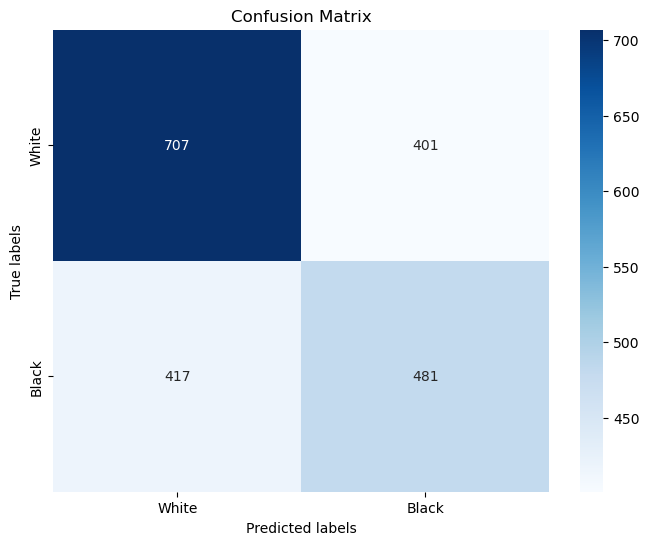

<Figure size 640x480 with 0 Axes>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    return plt
#     plt.show()

# Assuming you have already trained the decision tree classifier and made predictions
# Replace clf, X_test, y_test with your actual classifier and test data
plot_confusion_matrix(y_test, y_predTest, classes=['White', 'Black'])  # Replace with your class labels

In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Assuming you have a DataFrame named df with features and y as the target variable

X = move.values
y = data['winner']=='black'

encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=42)

# Create and train Random Forest classifier
clf = RandomForestClassifier(criterion='gini', max_depth=70)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6021934197407777


<module 'matplotlib.pyplot' from 'C:\\Users\\Qirui Zheng\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

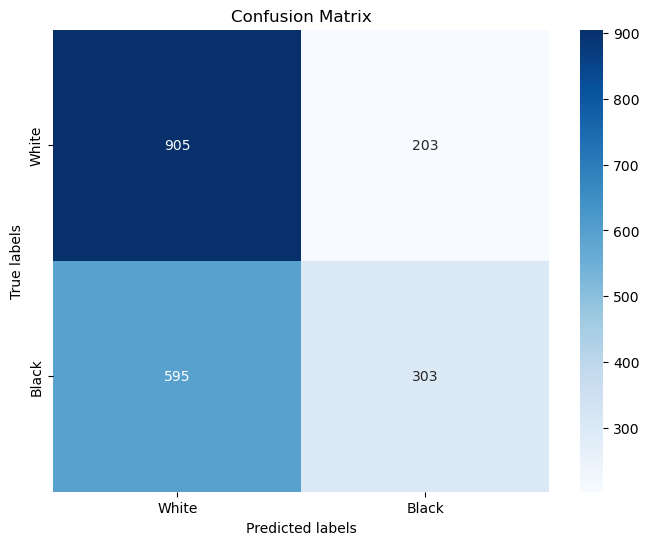

In [42]:
plot_confusion_matrix(y_test, y_pred, classes=['White', 'Black'])

In [43]:
accuracy_score(y_train, clf.predict(X_train))

0.9019499224462664

In [73]:
!git add .
!git commit -m "decision tree"
!git push

[main e32e2ad] decision tree
 2 files changed, 461 insertions(+)
 create mode 100644 .ipynb_checkpoints/decisionTree-checkpoint.ipynb
 create mode 100644 decisionTree.ipynb


To https://github.com/wkam3/math189-project.git
   1fbd3be..e32e2ad  main -> main
